Машинсон Всеволод Валерьевич

## Эксперименты

In [3]:
from sklearn import datasets
x = datasets.fetch_openml("mnist_784")

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.model_selection import KFold, BaseCrossValidator
from sklearn.metrics import accuracy_score
from knn.classification import KNNClassifier
from knn.model_selection import knn_cross_val_score


In [98]:
TRAIN_COUNT = 60000
X_train, y_train = x["data"][:TRAIN_COUNT], x["target"][:TRAIN_COUNT]
X_test, y_test = x["data"][TRAIN_COUNT:], x["target"][TRAIN_COUNT:]
features_count = X_train.shape[1]

## Эксперимент 2.1

Исследовать, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.
Для каждого объекта тестовой выборки найти 5 его ближайших соседей в обучающей для евклидовой
метрики. Для выборки нужно выбрать подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).
Необходимо проверить все алгоритмы поиска ближайших соседей, указанные в спецификации к заданию.

In [102]:
NEIGHBOURS_COUNT = 5
np.random.seed(117)

algorithms = ['my_own', 'brute', 'ball_tree', 'kd_tree']
features_indicies = map(lambda x: (x, np.random.choice(features_count, size=x, replace=False)), [10, 20, 100])

neighbours_time = {}
for alg in algorithms:
    for features_number, indicies in features_indicies:
        print(f'alg = {alg} features_count = {features_number} indicies = {indicies}')
        X_train_reduced = X_train[:, indicies]
        X_test_reduced = X_test[:, indicies]
        print('algsfasfsafasfsfasf')
        clf = KNNClassifier(n_neighbors=NEIGHBOURS_COUNT, algorithm=alg, metric='euclidean', weights='uniform')
        clf.fit(X_train_reduced, y_train)
        print("Fitted")
        start = timer()
        neighbours = clf.kneighbors(X_test_reduced)
        end = timer()
        calc_time = end - start
        neighbours_time[(alg, features_number)] = calc_time
        print(f"neighbours time {calc_time}")


alg = my_own features_count = 10 indicies = [102  20 590 387  17 329 350 683 152 592]
algsfasfsafasfsfasf
Fitted
neighbours time 248.4571412080004
alg = my_own features_count = 20 indicies = [ 76 763 130 666 776 452 298 525 366 556 153 125 774 637 579 566 749 752
  70 135]
algsfasfsafasfsfasf
Fitted
neighbours time 248.6029280799994
alg = my_own features_count = 100 indicies = [683 251 127 596  14 656 480  13 139 711 157  24 542  31 499 111 116  70
 304  10 316  94 773 149 464 504 305 438 781 538 760 577 734 623 567 121
 501 521 749 779 150 580  47 100 315 110 753 710 240  63 732 597  97  25
 217 187 661 284 667 706 548 232 412 242 626 386  93 396 228  64 527 483
 136 156 306 564 764 372 355   8 432 222 654 702 558 699  41 309 550  80
  79 456 503 569 610 269  83 119 533 366]
algsfasfsafasfsfasf
Fitted
neighbours time 454.2199622490007


## Эксперимент 2.2

Оценить по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) и время
работы k ближайших соседей в зависимости от следующих факторов:
(a) k от 1 до 10 (только влияние на точность).
(b) Используется евклидова или косинусная метрика.
Для подсчёта точности можно воспользоваться функцией accuracy_score из библиотеки scikit-learn.


In [ ]:
cv = KFold(n_splits=3)
knn_cross_val_score(X)

In [24]:
x.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [25]:
x['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [26]:
x['target'][:100]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2',
       '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7',
       '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0',
       '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4',
       '5', '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1',
       '1', '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6',
       '7', '4', '6', '8', '0', '7', '8', '3', '1'], dtype=object)

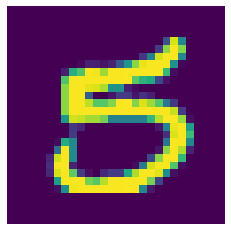

In [51]:
fig = plt.figure()
Nsample = 10
labels = list(range(10))
for y in labels:
    d = X_train[622, :]
#     for idx in range(Nsample):
#     a = fig.add_subplot(Nsample, len(labels), idx * len(labels) + y + 1)
    plt.imshow(d.reshape((28,28)))
    plt.axis('off')
    if idx == 0:
        a.set_title('{}'.format(y))

plt.show()

In [38]:
X_train[1, :]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
blf = BatchedKNNClassifier(n_neighbors=5, algorithm='my_own', weights='uniform')
blf.set_batch_size(1000)